### METAHEURISTICS EXAM DSTI A19
#### Jean MILPIED
#### date: May 26

### F2:  Schwefel’s Problem 2.21

The Schwefel's problem 2.21 function is:  
max of abs(z) + bias, where z=x-O (O is the D dimensional shift) and x=[x1,x2,...,xD]

In [1]:
import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import uniform
import math
import time

In [2]:
#objective function
def objective_F2(my_x):
    my_J=max(np.abs(my_x-my_shift))-450 #there is a bias (-450 is given in publication)
    return my_J

In [3]:
#initialize function
def initialize_my_X (D,range_min, range_max):
    my_X_init=np.random.uniform(low=range_min, high=range_max, size=D)
    return my_X_init

In [4]:
global my_obj #we create a global variable to consolidate the evolution of the objective function
#call-back function for the optimizer
def costF(Xi):
    my_obj.append(objective_F2(Xi))

In [7]:
my_obj=[]

def problem(my_size, my_func,my_bound_min,my_bound_max):
    global my_shift
    my_X0_2=initialize_my_X(my_size,my_bound_min,my_bound_max)
    my_shift=initialize_my_X(my_size,my_bound_min,my_bound_max) #we initialize the shift at random (this can be changed)
    t1=time.time()
    res = minimize(my_func, my_X0_2, bounds=(my_bound_min,my_bound_max),method='BFGS',tol=1e-6,options={'gtol': 1e-6, 'maxiter':10000,'disp': True}, callback=costF)
    t2=time.time()
    plt.plot(np.array(my_obj)+450)
    plt.xlabel("iterations")
    plt.ylabel("fitness")
    print("total computational time is ",np.round(t2-t1,4),"  seconds")
    print("optimization results are :", res.x)
    

Optimization terminated successfully.
         Current function value: -449.166808
         Iterations: 79
         Function evaluations: 16900
         Gradient evaluations: 325
total computational time is  0.2213   seconds
optimization results are : [ 64.82897611  91.9184073   19.46182106 -81.03996807 -96.88999518
 -16.80741156  78.37686385  97.8396736  -40.40682571  17.67510229
  34.29700419 -46.82298857 -13.89447485  47.03643711 -55.40227262
 -37.32576733  -4.58894941  11.41086483  10.85067937 -77.72240288
  48.87365308 -12.07066999  28.5188638   44.40060956  50.73199404
  49.61299102 -71.52496468  71.14347248  31.90408494  67.41821396
 -54.47792018  86.25706419  55.40841944  18.6489518  -89.93578761
 -24.72203581  81.40022573  -3.09359988  68.79779905 -96.72370525
  21.61289571  91.25196962  -1.57781347   3.36143385 -31.42970101
 -78.08888834 -32.37627942  41.69086803  20.9678059   26.74129723]


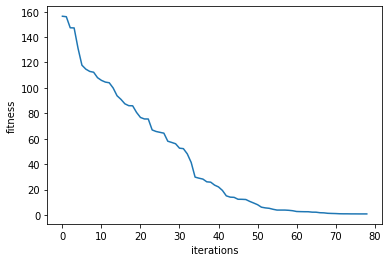

In [8]:
problem(50,objective_F2,-100,100)

Optimization terminated successfully.
         Current function value: -446.332061
         Iterations: 512
         Function evaluations: 581316
         Gradient evaluations: 1158
total computational time is  37.9746   seconds
optimization results are : [ 41.24240828  89.3277963  -94.64880065 -97.06727854 -56.27888939
  33.60670344  11.80538764 -48.67053968 -47.16674201  52.50193358
   9.95972311  94.77181733  38.80474566 -54.69258067 -24.66029128
 -88.83223887  32.38854189  96.80425609  43.3743829   33.52984833
   4.8538676   89.27308154 -95.34216665  38.6255361  -41.60820009
 -47.82323457 -38.9512548  -66.04249862 -60.37342272   1.51488623
 -96.9700944   35.11968751  37.72848429 -68.78707817  24.21567842
  97.90143398  79.25999039 -76.58599591  46.15083346 -72.75193519
  86.3964179    0.63543215  21.47757757  67.37764524  32.19304865
 -64.38049729  32.50907273  22.72793441   1.30516913  90.36607032
 -38.79843442 -28.18486007 -20.85822339  55.43049076  36.19923714
 -56.72225028  34.

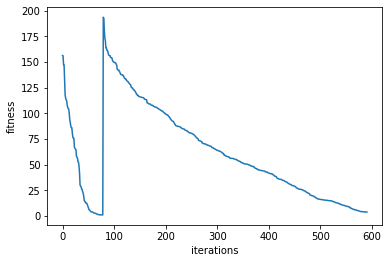

In [9]:
problem(500,objective_F2,-100,100)